In [10]:
import math
import numpy
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from mpl_toolkits import mplot3d
from prettytable import PrettyTable

### Задача 1
$$
\begin{cases}  
-\frac{\partial^2u}{\partial t^2}=\frac{\rho}{E}\frac{\partial^2u}{\partial x^2}, 0<x<L,
\\
u(0,t) = 0, u(L,t)=0 = U_{b}, 0\le t \le T
\end{cases}  
$$

$$
u(x,0)=-\frac{\rho}{E}\frac{\partial^2u}{\partial x^2}
$$

*$\frac{\rho}{E}$ - получается парабола на зависящая от времени*

*$\frac{E}{\rho}$ - получается чето прикольноe, но для устойчивости нужно $\rho \approx 5.9e4$ (лучше конечно накладывать условие на $\frac{E}{\rho}$, но не хочется)*

#### Формулы

##### Для $v+1 \geq 2$ 
$$
y_{k}^{v+1}=
\frac{\rho}{E} {\tau^2 \over h^2} (y_{k-1}^{v} - 2y_{k}^{v} + y_{k+1}^{v}) + 2y_{k}^{v} -y_{k}^{v-1}
$$

##### Для $v = 0$

$$
y_{k}^{0}=p_{k}=-4\frac{\Delta u}{L^2}x^2 + 4\frac{\Delta u}{L}x
$$

##### Для $v = 1$
$$
y_{k}^{1}=y_{k}^{0}(1+\frac{\tau^2}{2})
$$

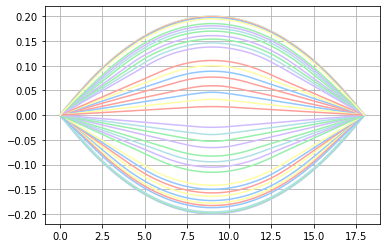

In [25]:
L = 18
T = 0.1

delta_u = 0.2
E = 120e9
ro = 5.9e4

h = L / 100
tau = 0.0001

def p(x):
    return -4*delta_u / (L ** 2) * x ** 2  + 4*delta_u / L * x

count_plots = 40

count_x = int((L) / h) + 1
count_t = int(T / tau) + 1
x = numpy.linspace(0, L, count_x)
t = numpy.linspace(0, T, count_t)

y = numpy.zeros(shape=(count_t, count_x))
y[0, :] = p(x)

y[1, :] = p(x)*(1+tau**2/2)
        
for v in range(1, count_t-1):
    for k in range(1, count_x-1):
        y[v+1,k] = E*tau**2 / (ro*h**2) * (y[v,k-1] - 2*y[v,k] + y[v,k+1]) + 2*y[v,k] - y[v-1,k]
    
for i in range(0, count_t, (int)(count_t / count_plots)):
    plt.plot(x, y[i,:])

plt.grid()
plt.show()

### Задача 2
$$
\begin{cases}  
-\frac{\partial^2u}{\partial t^2}=\frac{\rho}{E}\frac{\partial^2u}{\partial x^2}+\frac{\rho}{E}\frac{\partial^2u}{\partial y^2}, 0 \le t \le T, -a/2 \le x \le a/2, -b/2 \le y \le b/2
\\
u(0,x,y) = p(x,y), u'(0,x,y)=q(x,y),
\\
u(t,-\frac{a}{2},y)=u(t,\frac{a}{2},y)=0,
\\
u'(t,x,-\frac{b}{2})=u'(t,x,\frac{b}{2})=0
\end{cases}  
$$

#### Формулы

##### Для $v+1 \geq 2$ 
$$
y_{k,l}^{v+1}=
{\tau^2 \over h_{x}^2} (y_{k-1,l}^{v} - 2y_{k,l}^{v} + y_{k+1,l}^{v}) 
+{\tau^2 \over h_{y}^2} (y_{k,l-1}^{v} - 2y_{k,l}^{v} + y_{k,l-1}^{v}) 
+ 2y_{k,l}^{v} -y_{k,l}^{v-1}
$$

##### Для $v = 0$

$$
y_{k,l}^{0}=p_{k,l}
$$

##### Для $v = 1$
$$
y_{k,l}^{1}=
p_{k,l} + \tau q_{k,l} +
{\tau^2 \over 2h_{x}^2} (p_{k-1,l} - 2p_{k,l} + p_{k+1,l}) 
+{\tau^2 \over 2h_{y}^2} (p_{k,l-1} - 2p_{k,l} + p_{k,l-1})
$$

##### Граничные условия
$$
y_{0,l}^{v}=y_{-1,l}^{v}=0
$$
$$
y_{k,0}^{v}=y_{k,1}^{v}\\
y_{k,-1}^{v}=y_{k,-2}^{v}
$$

In [12]:
a, b = 2, 1
T = 4

h_x = a/100
h_y = b/100
tau = 0.001

def p(x, y):
    return numpy.arctan(numpy.cos(numpy.pi*x/a))

def q(x, y):
    return numpy.sin(2*numpy.pi*x/a)*numpy.sin(2*numpy.pi*y/b)

count_x = int(a / h_x) + 1
count_y = int(b / h_y) + 1
count_t = int(T / tau) + 1
x = numpy.linspace(-a/2, a/2, count_x)
y = numpy.linspace(-b/2, b/2, count_y)
t = numpy.linspace(0, T, count_t)

u = numpy.zeros(shape=(count_t, count_x, count_y))
u[0,:,:]=p(x,y)    
u[1,1:-1,1:-1] = 0 \
        + tau**2 / h_x**2 * (u[0,0:-2,1:-1] - 2*u[0,1:-1,1:-1] + u[0,2:,1:-1] ) \
        + tau**2 / h_y**2 * (u[0,1:-1,0:-2] - 2*u[0,1:-1,1:-1] + u[0,1:-1,2:]) \
        + 2*u[0,1:-1,1:-1] - u[0-1,1:-1,1:-1]
    
# u[1,:,0] = u[1,:,1]
# u[1,:,-1] = u[1,:,-2]
u[1,0,:] = u[1,1,:]
u[1,-1,:] = u[1,-2,:]
        
for v in range(1, count_t-1):
    u[v+1,1:-1,1:-1] = 0 \
        + tau**2 / h_x**2 * (u[v,0:-2,1:-1] - 2*u[v,1:-1,1:-1] + u[v,2:,1:-1] ) \
        + tau**2 / h_y**2 * (u[v,1:-1,0:-2] - 2*u[v,1:-1,1:-1] + u[v,1:-1,2:]) \
        + 2*u[v,1:-1,1:-1] - u[v-1,1:-1,1:-1]
#     u[v+1,:,0] = u[v+1,:,1]
#     u[v+1,:,-1] = u[v+1,:,-2]
    u[v+1,0,:] = u[v+1,1,:]
    u[v+1,-1,:] = u[v+1,-2,:]  

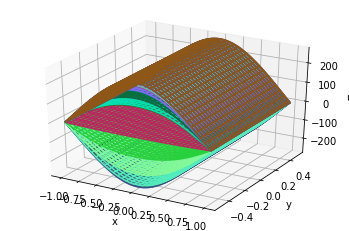

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')

_x, _y = numpy.meshgrid(x, y)
for v in range(0, count_t, (int)(count_t / 30)):
    ax.plot_wireframe(_x, _y, u[v,:,:], color=numpy.random.rand(3,))